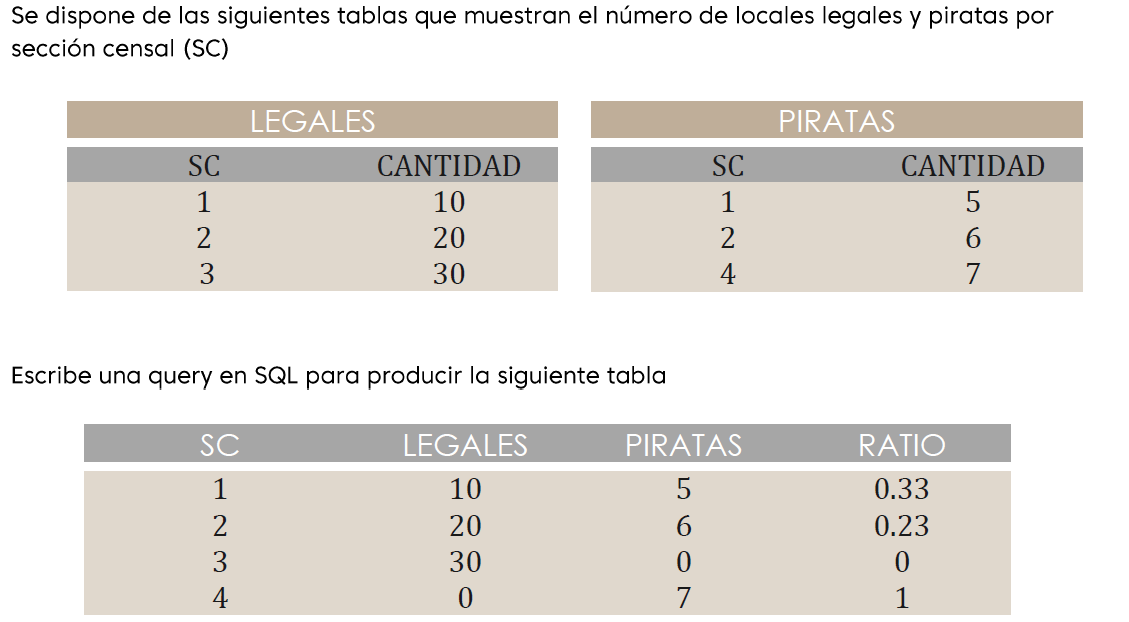

In [1]:
import sqlite3
import pandas as pd

In [2]:
legales = pd.DataFrame({'SC':[1,2,3],
                       'Cantidad':[10,20,30]})

piratas = pd.DataFrame({'SC':[1,2,4],
                       'Cantidad':[5,6,7]})

In [3]:
# Conexión a una base de datos
conn = sqlite3.connect('RAFA.sqlite')
#cursor = conn.cursor()

In [4]:
# Crear tablas a partir de dataframes
legales.to_sql('LEGALES', conn, index=False)

In [5]:
piratas.to_sql('PIRATAS',conn,index=False)

In [6]:
pd.read_sql('SELECT * FROM LEGALES',conn)

,SC,Cantidad
0,1,10
1,2,20
2,3,30


In [7]:
pd.read_sql('SELECT * FROM PIRATAS',conn)

,SC,Cantidad
0,1,5
1,2,6
2,4,7


Emular un FULL JOIN en sqlite ([Fuente](https://en.wikipedia.org/wiki/Join_%28SQL%29#Full_outer_join))

In [22]:
query ='''
SELECT LEGALES.*, PIRATAS.*
FROM   LEGALES 
       LEFT JOIN PIRATAS 
          ON LEGALES.SC = PIRATAS.SC
UNION ALL
SELECT LEGALES.*, PIRATAS.*
FROM   PIRATAS
       LEFT JOIN LEGALES
          ON LEGALES.SC = PIRATAS.SC
WHERE  LEGALES.SC IS NULL
'''

pd.read_sql(query,conn)

,SC,Cantidad,SC,Cantidad
0,1.0,10.0,1.0,5.0
1,2.0,20.0,2.0,6.0
2,3.0,30.0,NaN,NaN
3,NaN,NaN,4.0,7.0


Uso de `COALESCE`

In [25]:
query ='''
SELECT COALESCE(SC1,SC2) AS SC,
       COALESCE(Cantidad1,0) as LEGALES,
       COALESCE(Cantidad2,0) as PIRATAS,
       COALESCE(1.0*Cantidad2,0)/(COALESCE(Cantidad2,0)+COALESCE(Cantidad1,0)) as RATIO
FROM
(
    SELECT LEGALES.SC AS SC1,LEGALES.Cantidad as Cantidad1,
           PIRATAS.SC AS SC2,PIRATAS.Cantidad as Cantidad2
    FROM   LEGALES 
           LEFT JOIN PIRATAS 
              ON LEGALES.SC = PIRATAS.SC
    UNION ALL
    SELECT LEGALES.*, PIRATAS.*
    FROM   PIRATAS
           LEFT JOIN LEGALES
              ON LEGALES.SC = PIRATAS.SC
    WHERE  LEGALES.SC IS NULL
)
'''

pd.read_sql(query,conn)

,SC,LEGALES,PIRATAS,RATIO
0,1,10,5,0.333333
1,2,20,6,0.230769
2,3,30,0,0.000000
3,4,0,7,1.000000
